# Módulo 1: Análisis de datos en el ecosistema Python

### Sesión (17)

**08/01/2024**

# `ALEJANDRO SÁNCHEZ MONZÓN`

## Clasificación de imágenes con redes neuronales convolucionales

In [1]:
# importamos las librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Modificamos los parámetros de los gráficos en matplotlib
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 12, 6 # el primer dígito es el ancho y el segundo el alto
rcParams["font.weight"] = "bold"
rcParams["font.size"] = 10
rcParams["axes.labelweight"] = "bold"

### Cargar los datos (imágenes)

In [3]:
# Cargar el dataset desde la librería keras
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# Vamos a escalar los valores de nuestras arrays para que se convierten en valores entre 0 y 1
X_train_norm = X_train / 255
X_test_norm = X_test / 255


In [5]:
# La codificación one-hot se puede realizar fácilmente con las utilidades proporcionadas por Keras
from keras.utils import to_categorical

y_train_norm = to_categorical(y_train, dtype='uint8')
y_test_norm = to_categorical(y_test, dtype='uint8')

print("Etiqueta de la segunda imágen: ", y_train[1])
print("Etiqueta normalizada de la segunda imágen: ", y_train_norm[1])

Etiqueta de la segunda imágen:  0
Etiqueta normalizada de la segunda imágen:  [1 0 0 0 0 0 0 0 0 0]


In [6]:
# Vamos a redimensionar los datos normalizados de entrada
x_train = X_train_norm.reshape(len(X_train_norm),28,28,1)
x_test = X_test_norm.reshape(len(X_test_norm),28,28,1)

print("El tamaño de datos de entrada (training):", x_train.shape)
print("El tamaño de datos de entrada (test):", x_test.shape)

print("El tamaño de entrada a la red:", x_train[0].shape)

El tamaño de datos de entrada (training): (60000, 28, 28, 1)
El tamaño de datos de entrada (test): (10000, 28, 28, 1)
El tamaño de entrada a la red: (28, 28, 1)


---

### **`Ejercicio 17.1`**

Crea una ___ConvNet___ basada en la estructura recomendada en el siguiente diagrama, considerando los siguientes puntos. Explica si este último modelo tiene un buen rendimiento comparando con las métricas y los tamaños de los modelos anteriores:
- El tamaño de los _kernels_ aplicada en la capa convolucional es de (`3x3`).
- `semilla=333`,
- `epochs=3`,
- `batch_size=1000`,
- `umbral=0.5`

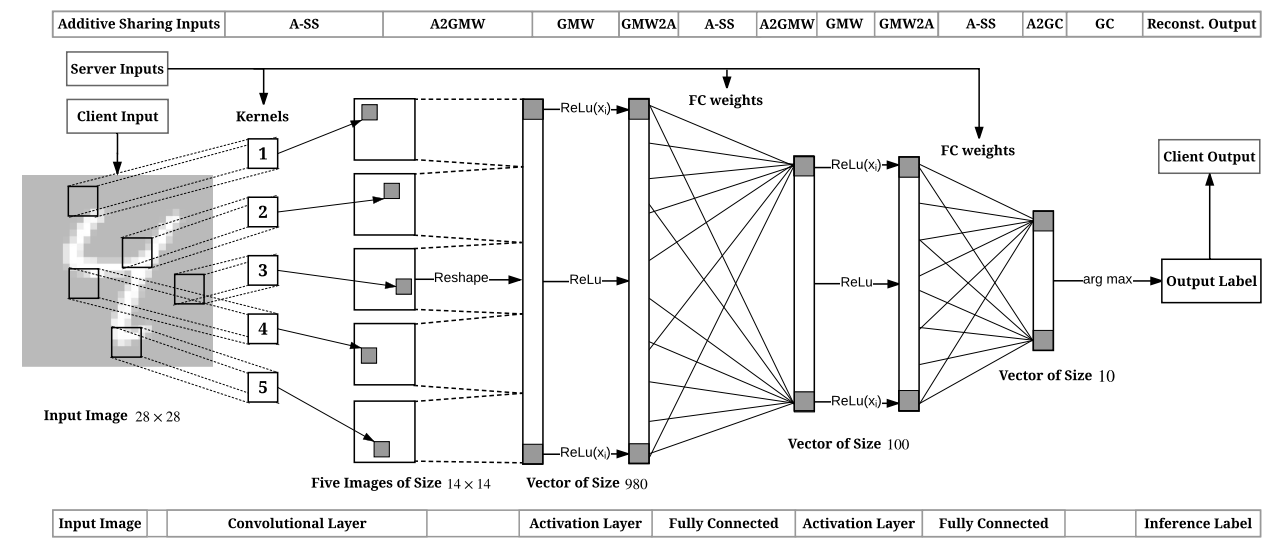



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 5)         50        
                                                                 
 flatten (Flatten)           (None, 3380)              0         
                                                                 
 dense (Dense)               (None, 100)               338100    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 339160 (1.29 MB)
Trainable params: 339160 (1.29 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/3


60/60 [==============================] - 7s 98ms/step - loss: 0.3191 - accuracy: 0.5060 - val_loss: 0.1782 - val_accuracy: 0.8365
Epoch 2/

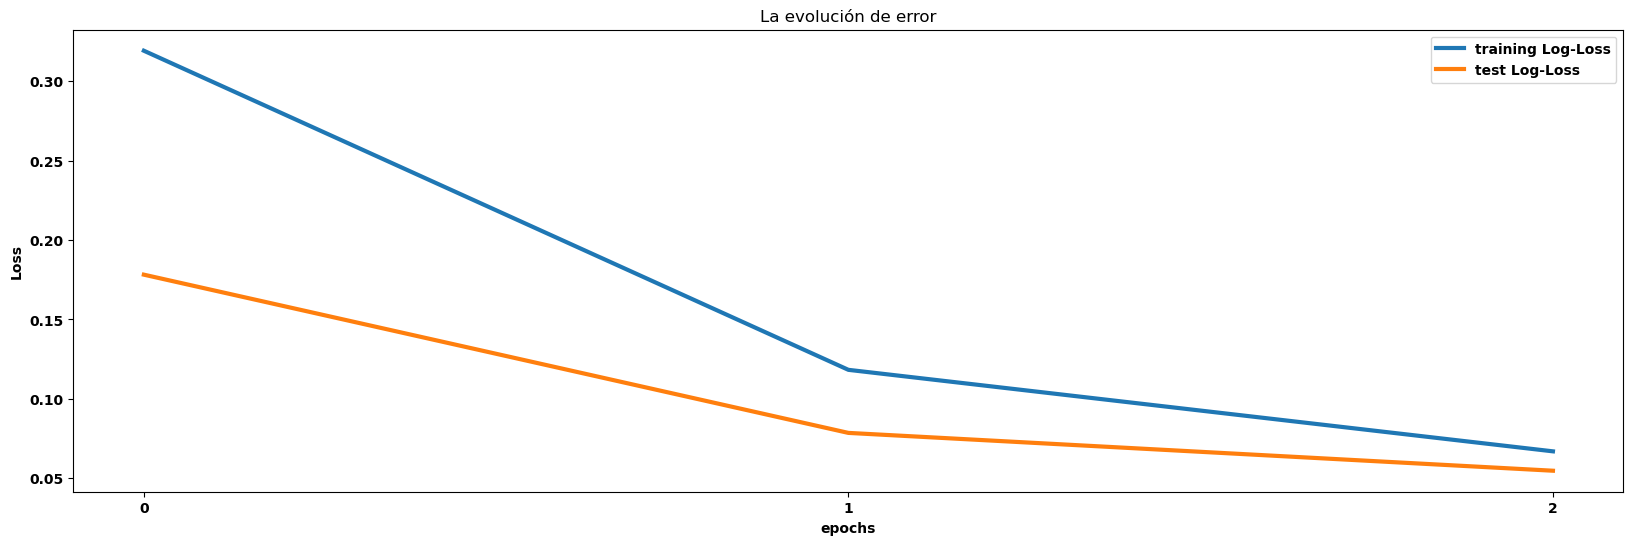

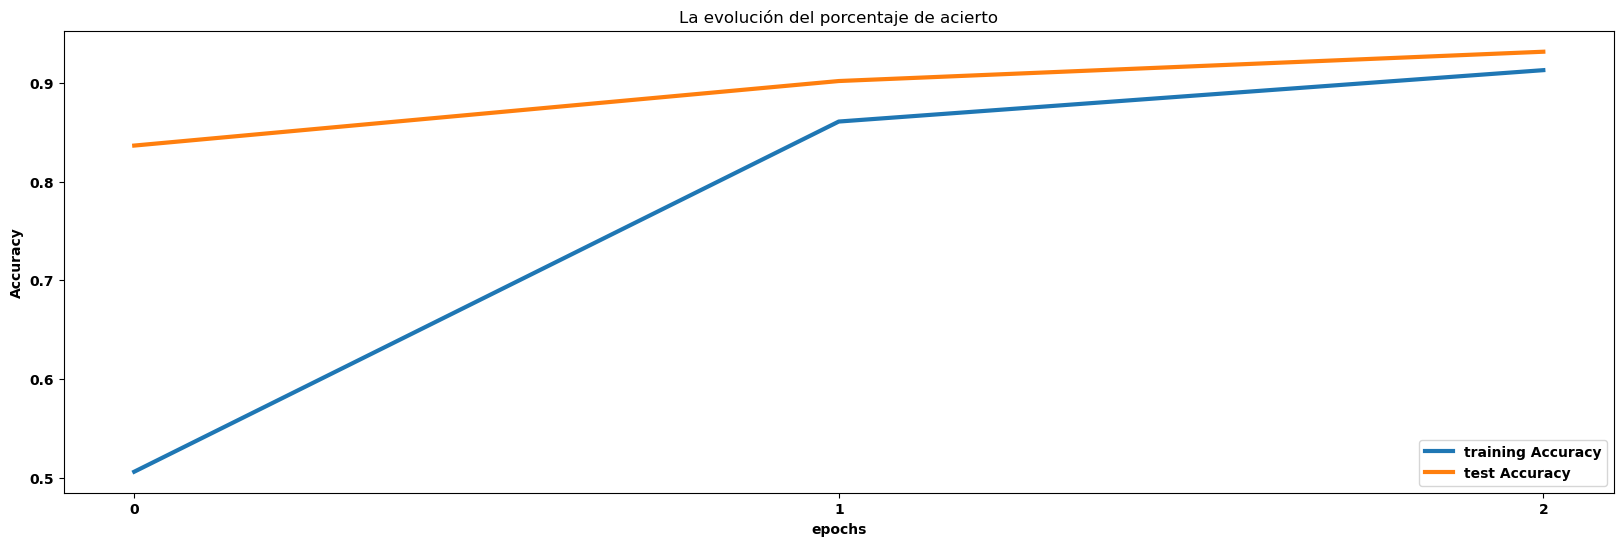

In [7]:
# Solución
# Ejercicio 17.1
import random
import tensorflow as tf
from keras.models import Sequential
from keras import Input
from keras.layers import Dense, Conv2D, Flatten
from sklearn.metrics import accuracy_score, roc_auc_score
from keras.backend import clear_session

clear_session()

semilla_17_1 = 333
random.seed(semilla_17_1)
np.random.seed(semilla_17_1)
tf.random.set_seed(semilla_17_1)

modelo_cnn_17_1 = Sequential()
modelo_cnn_17_1.add(Input(shape=x_train[0].shape))
modelo_cnn_17_1.add(Conv2D(filters=5, kernel_size=(3,3), activation='relu'))
modelo_cnn_17_1.add(Flatten())
modelo_cnn_17_1.add(Dense(100, activation='relu'))
modelo_cnn_17_1.add(Dense(10, activation='softmax'))

modelo_cnn_17_1.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

modelo_cnn_17_1.summary()

registros_17_1 = modelo_cnn_17_1.fit(x_train, y_train_norm, validation_data=(x_test, y_test_norm), epochs=3, batch_size=1000)

y_pred_cnn_17_1 = modelo_cnn_17_1.predict(x_test)

y_pred_cnn_filt_17_1 = np.where(y_pred_cnn_17_1 < 0.5, 0, 1)
print('Acuuracy:', accuracy_score(y_test_norm, y_pred_cnn_filt_17_1))
print('AUC:', roc_auc_score(y_test_norm, y_pred_cnn_filt_17_1))

plt.figure(figsize=(20,6))
plt.plot(registros_17_1.epoch, registros_17_1.history['loss'], linewidth=3, label='training Log-Loss')
plt.plot(registros_17_1.epoch, registros_17_1.history['val_loss'], linewidth=3, label='test Log-Loss')
plt.xticks(registros_17_1.epoch)
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('La evolución de error')
plt.legend(loc = 'upper right')
plt.show()

plt.figure(figsize=(20,6))
plt.plot(registros_17_1.epoch, registros_17_1.history['accuracy'], linewidth=3, label='training Accuracy')
plt.plot(registros_17_1.epoch, registros_17_1.history['val_accuracy'], linewidth=3, label='test Accuracy')
plt.xticks(registros_17_1.epoch)
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('La evolución del porcentaje de acierto')
plt.legend(loc = 'lower right')
plt.show()

#### `Explicación 17.1`
> Podemos observar un modelo con un **Accuracy** de **0.9198** y un **AUC** de **0.956**, lo que lo convierte en un modelo con unas métricas bastate **buenas**, pero en comparación con otros modelos de esta sesión, deja un poco que desear (algunos de los otros modelos de la sesión tienen métricas casi perfectas).
>
> En cuanto al tmaño, podemos destacar que es un modelo con un total de **339160 parámetros** en cuanto a tamaño. No es un modelo muy grande, hemos visto en la sesión modelos de en torno a **1.8M** de parámetros. Pero también hemos visto algun modelo más pequeño.
> Esto se traduce en que su **complejidad** es **menor** en comparación con modelos que son más grandes, lo que puede tener un efecto directo en sus métricas.

---

### **`Ejercicio 17.2`**

Saca la gráfica del **Learning Curve** con la estructura del último modelo analizado en la sesión (`modelo_cnn_pool`), definiendo y aplicando una función nueva considerando los siguientes puntos. Analiza y compara los resultados entre diferentes curvas y explica el modelo que se puede elegir como mejor clasificador:
- La función toma solamente una entrada para el hiperparámetro `epochs`con `1` como el valor por defecto. Dibuja diferentes curvas para distintos números de iteraciones (_`epochs`_: `{1, 2, 3}`)
- La curva muestra la evolución de `Accuracy` tanto para el conjunto de _training_ como para el dataset de _test_
- `semilla=333`,
- `batch_size=1000`,
- `umbral=0.5`
- (*Sugerencia*: No incluyas más de `5` puntos en el eje horizontal y empieza la gráfica con un mínimo de _100_ muestras para los modelos que se van a ajustar)

In [8]:
# Solución
# Ejercicio 17.2
import random
import tensorflow as tf
from keras.models import Sequential
from keras import Input
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from sklearn.metrics import accuracy_score
from keras.backend import clear_session

def curva_aprendizaje_17_2(epochs: int):
    clear_session()

    semilla_17_2 = 333
    random.seed(semilla_17_2)
    np.random.seed(semilla_17_2)
    tf.random.set_seed(semilla_17_2)

    num_samples_17_2 = np.linspace(100, x_train.shape[0]).astype(int)
    train_score_17_2 = np.zeros(num_samples_17_2.size)
    test_score_17_2 = np.zeros(num_samples_17_2.size)

    modelo_17_2 = Sequential()
    modelo_17_2.add(Input(shape=x_train[0].shape))
    modelo_17_2.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu'))
    modelo_17_2.add(MaxPooling2D(pool_size=(2,2)))
    modelo_17_2.add(Conv2D(filters=36, kernel_size=(5,5), activation='relu'))
    modelo_17_2.add(MaxPooling2D(pool_size=(2,2)))
    modelo_17_2.add(Flatten())
    modelo_17_2.add(Dense(128, activation='relu'))
    modelo_17_2.add(Dense(10, activation='softmax'))
    modelo_17_2.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

    for i in range(num_samples_17_2.size):
        modelo_17_2.fit(x_train[:num_samples_17_2[i]], y_train_norm[:num_samples_17_2[i]], epochs=epochs, batch_size=1000, verbose=0)

        y_pred_cnn_train = modelo_17_2.predict(x_train[:num_samples_17_2[i]])
        y_pred_train = np.where(y_pred_cnn_train < 0.5, 0, 1)

        y_pred_cnn_test = modelo_17_2.predict(x_test)
        y_pred_test = np.where(y_pred_cnn_test < 0.5, 0, 1)

        train_score_17_2[i] = accuracy_score(y_train_norm[:num_samples_17_2[i]], y_pred_train)
        test_score_17_2[i] = accuracy_score(y_test_norm, y_pred_test)

    print("La diferencia final del rendimiento del modelo entre training y test es= ", train_score_17_2[-1]-test_score_17_2[-1])

    plt.figure(figsize=(20,6))
    plt.plot(num_samples_17_2, test_score_17_2, linewidth=3, label='Test Accuracy')
    plt.plot(num_samples_17_2, train_score_17_2, linewidth=3, label='Train Accuracy')
    plt.plot(num_samples_17_2[np.argmax(test_score_17_2)], max(test_score_17_2),
            marker='o', color = "red", label="Max Accuracy")
    plt.xticks(np.linspace(100, x_train.shape[0], 5).astype(int))
    plt.xlabel('Tamaño de entrenamiento (Training size)')
    plt.ylabel('Accuracy')
    plt.legend(loc = 'lower right')
    plt.show()



313/313 [==============================] - 1s 4ms/step
La diferencia final del rendimiento del modelo entre training y test es=  0.003166666666666651


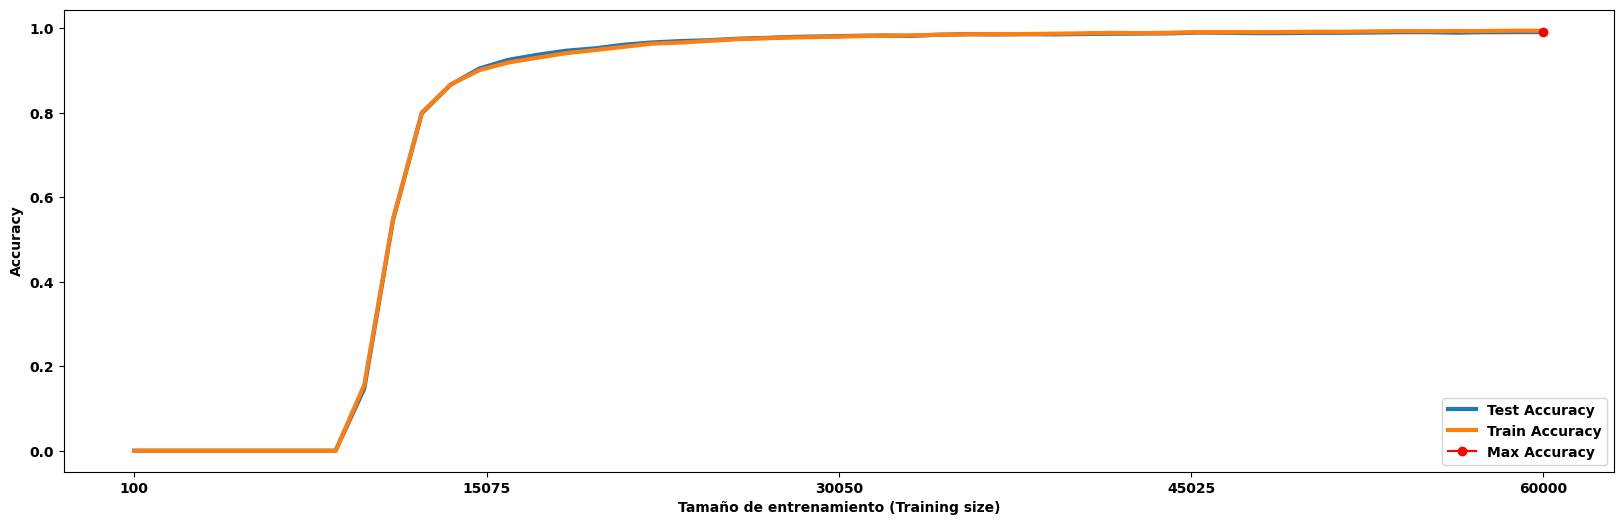

In [9]:
curva_aprendizaje_17_2(1)

313/313 [==============================] - 1s 4ms/step
La diferencia final del rendimiento del modelo entre training y test es=  0.00663333333333338


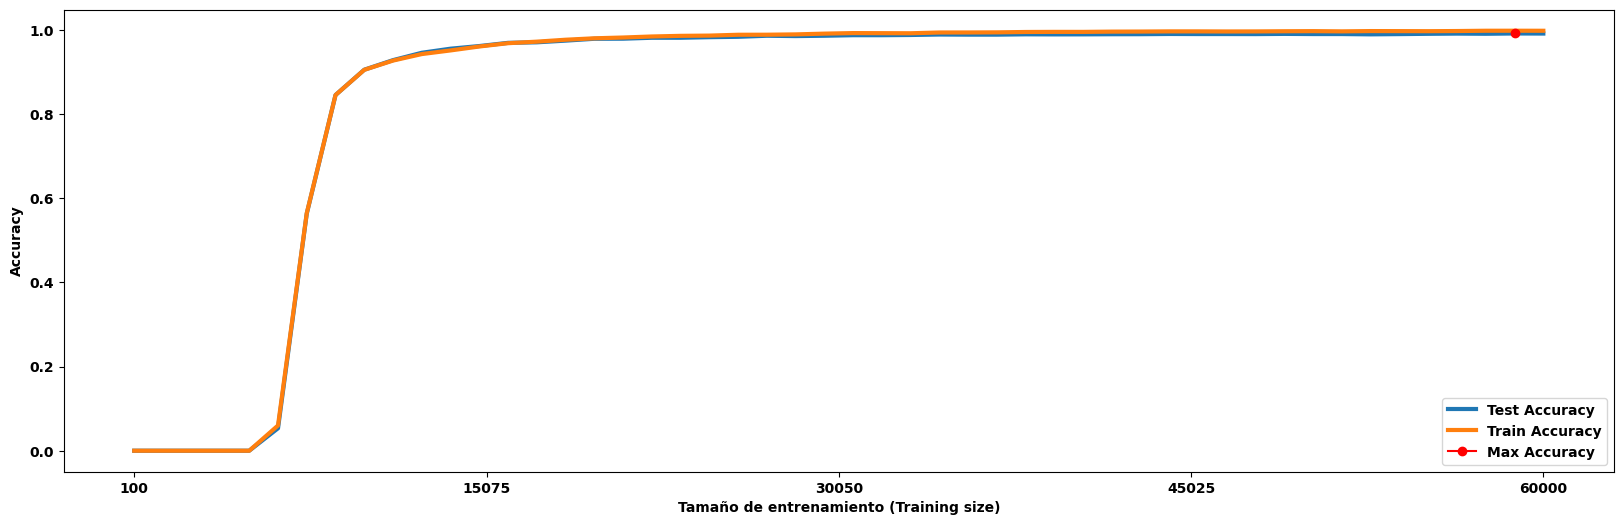

In [10]:
curva_aprendizaje_17_2(2)

313/313 [==============================] - 1s 3ms/step
La diferencia final del rendimiento del modelo entre training y test es=  0.007516666666666727


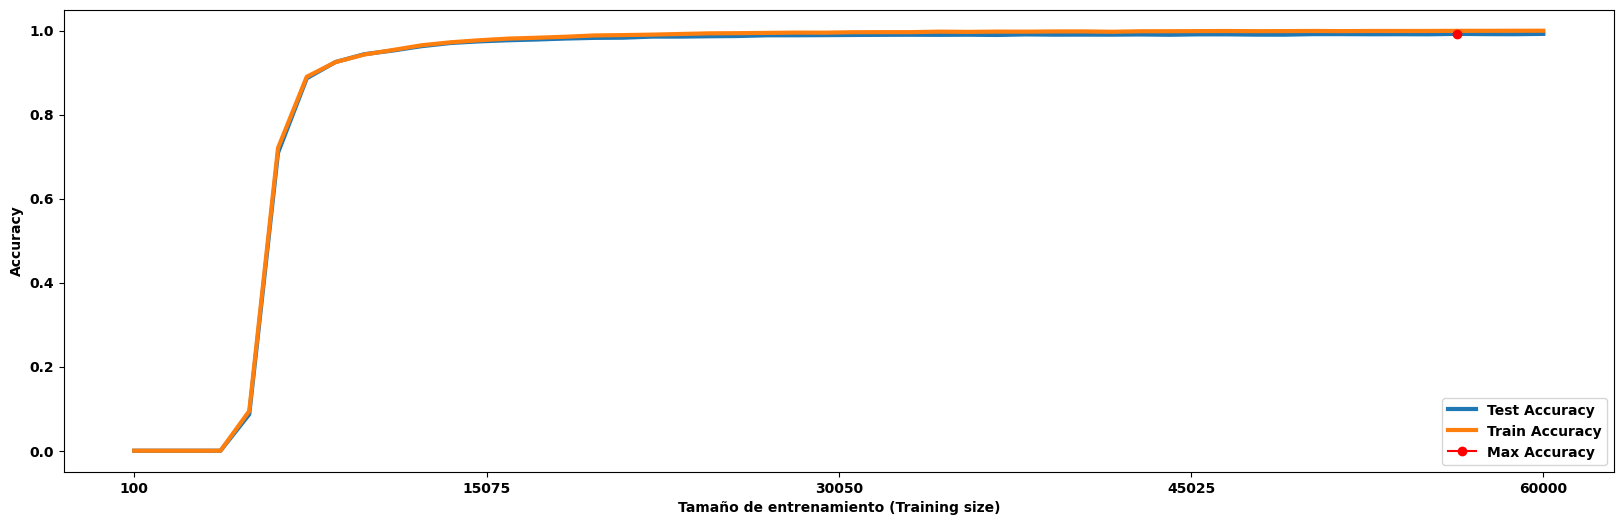

In [11]:
curva_aprendizaje_17_2(3)

#### `Explicación 17.2`
> Podemos observar que el modelo para un valor de 1 epoch presenta una gráfica para el conjunto de train y una para el conjunto de test practicamente son identicas, con un gap de **0.003** (casi inexistente) y una tendencia **ascendente** que roza valores de Accuracy perfectos, llegando incluso a **converger** en **diferentes ocasiones**. Considero que este modelo no tiene riesgo de sufrir **underfitting**, también considero que su riesgo de **overfitting** no es alto, ya que su capacidad para predecir nuevos datos parece ser bastante buena.
>
> El segundo modelo presenta también una gráfica muy parecida a la del modelo para 1 epoch, aunque este modelo parece que empieza a aprender con tamaños de entrenamiento más pequeños que el primer modelo de este ejercicio. Una vez más, el modelo con 2 epochs presenta una tendencia **ascendente**, con un gap de **0.006**, y dos gráficas que convergen varias veces a lo largo del tamaño del entrenamiento, llegando incluso a solaparse en repetidas ocasiones.
>
> Para el modelo que tiene 3 epochs, presentamos tambien dos gráficas practicamente idénticas, con un gap de **0.007**, pero una tendencia **ascendente** llegando a valores de **Accuracy casi perfectos**. Las gráficas para ambos conjuntos **convergen varias veces**, y podemos destacar que este nuevo modelo comienza a dar resultdos con valores de entrenamiento aún más pequeños incluso.
>
> Ninguno de los modelos sufre riesgo de **underfitting**, y tampoco hay un riesgo de **overfitting** presente.
>
> Considero que la elección del mejor clasificador es muy difícil, ya que todos lo modelos presentan curvas idénticas, aunque por un valor minúsculo, el que presenta **menos gap** es el que utiliza solo **1 epoch**, convirtiendole tambien en el **menos complejo** de todos. Sin embargo, el modelo que utiliza **3 epochs**, empieza a trabajar cuando el entrenamiento aun tiene un tamaño más pequeño que en el caso de los otros modelos.
> Teniendo que elegir uno, y teniendo presente la relación **eficiencia-recursos**, para mi el mejor modelo para clasificar es el que utiliza 1 epoch (**primer modelo** del ejercicio).